# 1. Import necessary libraries


In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# 2- Data Cleaning and Preprocessing


In [109]:
df1 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
df1.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [110]:
print("About Dataset:")
df1.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [111]:
df2 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
df2.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [112]:
print("About Dataset:")
df2.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [113]:
df2.isnull().sum()


date           0
dcoilwtico    43
dtype: int64

In [114]:
df3 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
df3.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [115]:
print("About Dataset:")
df3.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [116]:
df4 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
df4.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [117]:
print("About Dataset:")
df4.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [118]:
df5 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
df5.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [119]:
print("About Dataset:")
df5.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [120]:
df6 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
df6.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [121]:
print("About Dataset:")
df6.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [122]:
df7 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
df7.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [123]:
print("About Dataset:")
df7.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# 2- merge the data

rename the data sets

In [124]:
holiday = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
sample_submission = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
test = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")


In [125]:
# copying of train data and merging other data
df_train = train.merge(holiday, on = 'date', how='left')
df_train = df_train.merge(oil, on = 'date', how='left')
df_train = df_train.merge(stores, on = 'store_nbr', how='left')
df_train = df_train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train = df_train.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train[:2]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          UInt32        
 20  quarter       int32         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(4), o

In [127]:
df_train.isnull().sum()


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int32         
 18  month         int32         
 19  week          UInt32        
 20  quarter       int32         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(4), o

# 3- EDA

In [129]:
df_train.describe()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,week,quarter
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06,2.805231e+06,3.054348e+06,3.054348e+06,3054348.0,3.054348e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619456,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00,1.697071e+03,2.014842e+03,6.222870e+00,25.308635,2.413652e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00,2.013000e+03,1.000000e+00,1.0,1.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00,1.046000e+03,2.014000e+03,3.000000e+00,13.0,1.000000e+00
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00,1.395000e+03,2.015000e+03,6.000000e+00,25.0,2.000000e+00
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01,2.081000e+03,2.016000e+03,9.000000e+00,38.0,3.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03,2.017000e+03,1.200000e+01,53.0,4.000000e+00
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00,9.668317e+02,1.345607e+00,3.374251e+00,14.750509,1.095690e+00


In [130]:
df_train.shape


(3054348, 22)

In [131]:
df_train.dtypes


id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
holiday_type            object
locale                  object
locale_name             object
description             object
transferred             object
dcoilwtico             float64
city                    object
state                   object
store_type              object
cluster                  int64
transactions           float64
year                     int32
month                    int32
week                    UInt32
quarter                  int32
day_of_week             object
dtype: object

get_dummies() function to perform one-hot encoding.Creates a binary (0 or 1) column for each category

In [132]:
# Keep only the most relevant numerical variables
relevant_columns = ['sales', 'onpromotion', 'dcoilwtico', 'transactions']
correlation_matrix = df_train[relevant_columns].corr()


In [133]:
correlation_matrix

,sales,onpromotion,dcoilwtico,transactions
sales,1.000000,0.428241,-0.079393,0.214848
onpromotion,0.428241,1.000000,-0.152460,0.025809
dcoilwtico,-0.079393,-0.152460,1.000000,0.018664
transactions,0.214848,0.025809,0.018664,1.000000


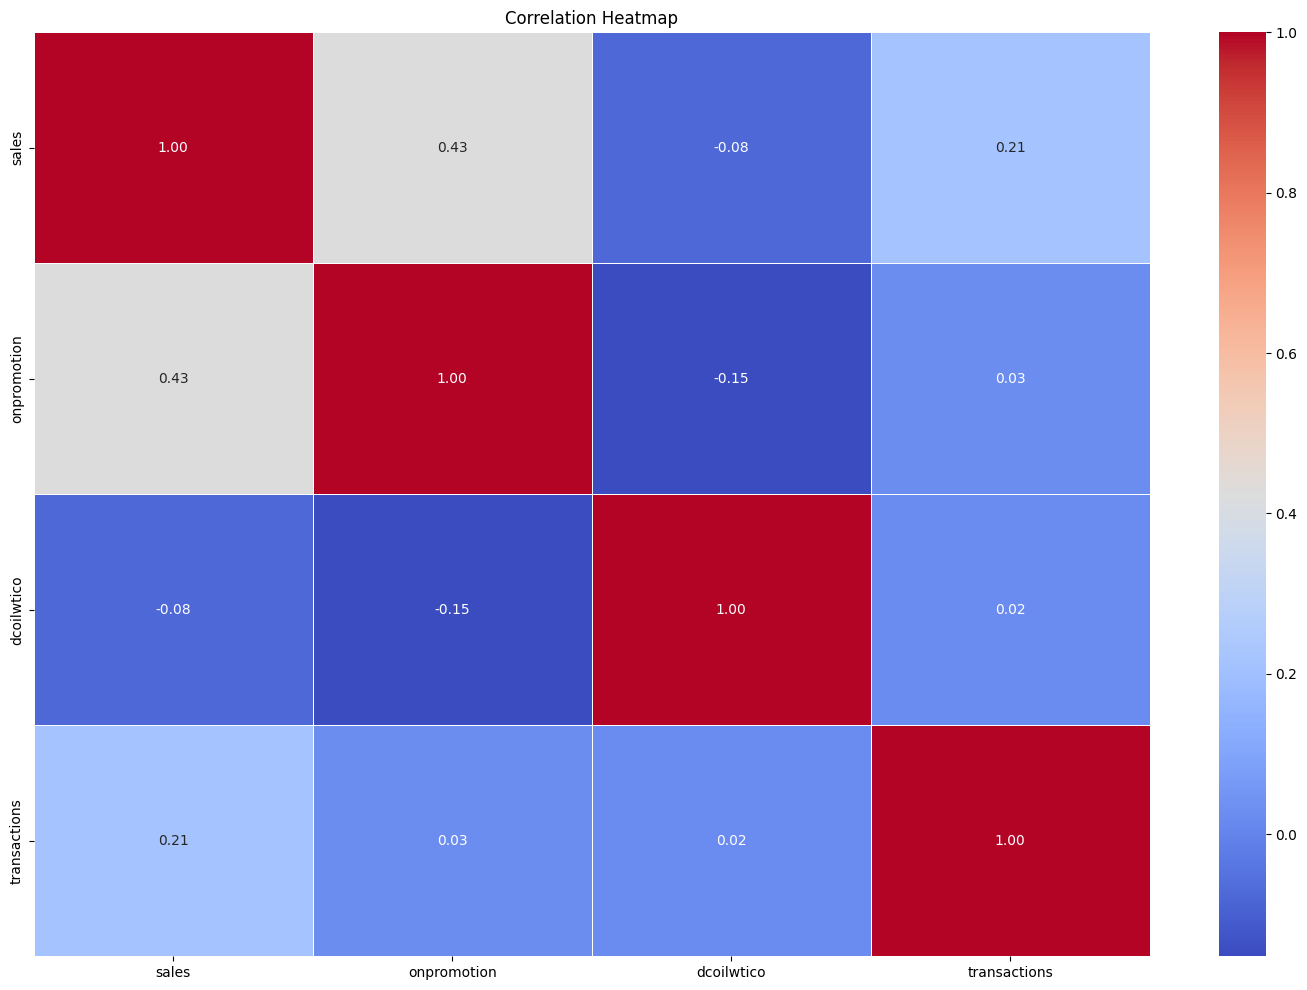

In [134]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [136]:
holiday_sales=df_train.groupby('holiday_type')['sales'].mean()
holiday_sales 

holiday_type
Additional    487.628925
Bridge        446.750854
Event         425.660065
Holiday       358.433812
Transfer      467.753110
Work Day      372.157524
Name: sales, dtype: float64

Additional holidays seem to generate the highest average sales (~487.63). 

Transfers also seem to lead to higher-than-average sales (~467.75).

Regular holidays (Holiday and Work Day) generate relatively lower sales on average compared to other holiday types.

In [143]:
df_train['holiday_type'].unique()


array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [144]:
df_train['store_type'].unique()


array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [145]:
df_train['family'].unique()


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [146]:
df_train['city'].unique()


array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='date'>

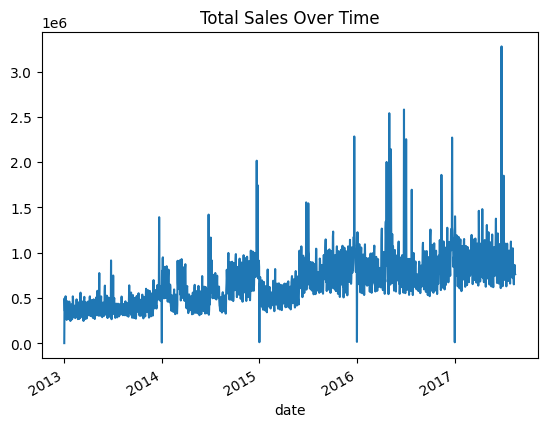

In [135]:
df_train.groupby('date')['sales'].sum().plot(title="Total Sales Over Time")


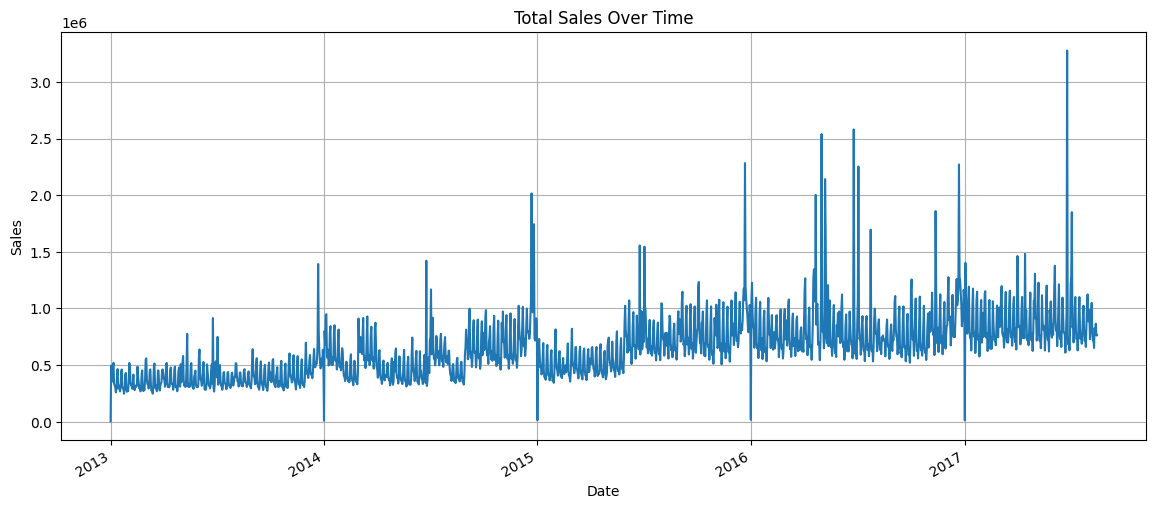

In [155]:
df_train.groupby('date')['sales'].sum().plot(figsize=(14, 6))
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Average Sales by Holiday Type'}, xlabel='holiday_type'>

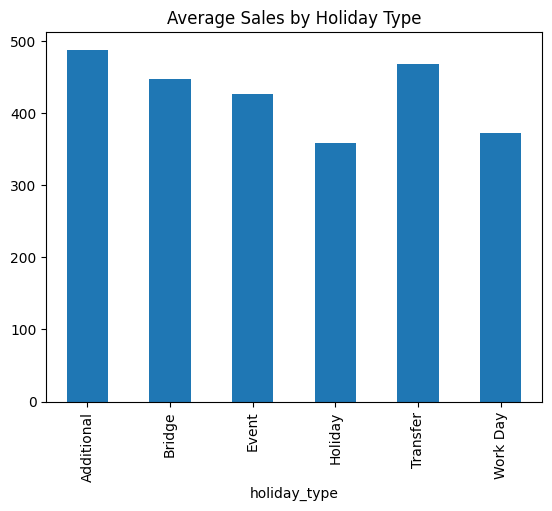

In [137]:
holiday_sales.plot(kind='bar', title='Average Sales by Holiday Type')


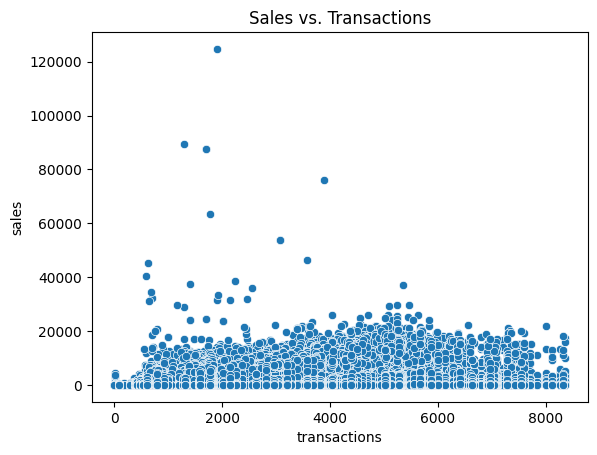

In [147]:
sns.scatterplot(data=df_train, x='transactions', y='sales')
plt.title('Sales vs. Transactions')
plt.show()


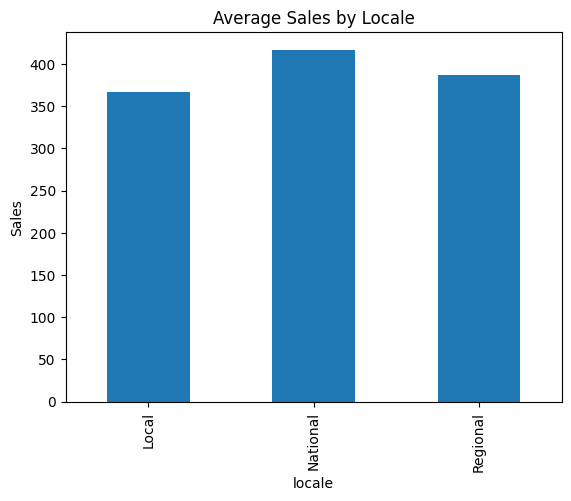

In [148]:
df_train.groupby('locale')['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Locale')
plt.ylabel('Sales')
plt.show()


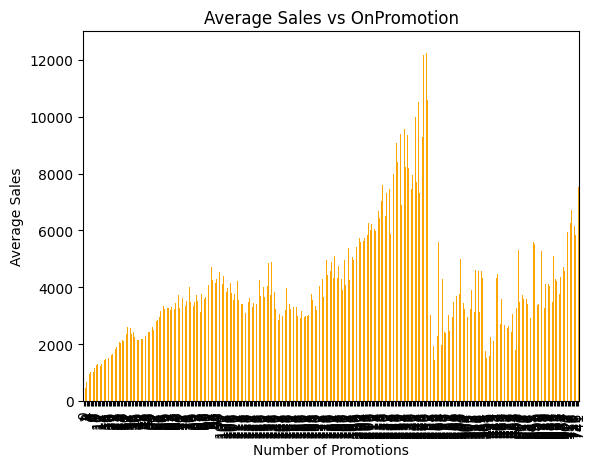

In [149]:
df_train.groupby('onpromotion')['sales'].mean().plot(kind='bar', color='orange')
plt.title('Average Sales vs OnPromotion')
plt.xlabel('Number of Promotions')
plt.ylabel('Average Sales')
plt.show()


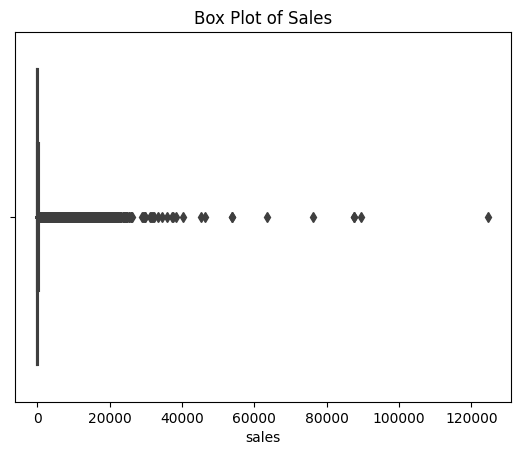

In [150]:
sns.boxplot(data=df_train, x='sales')
plt.title('Box Plot of Sales')
plt.show()


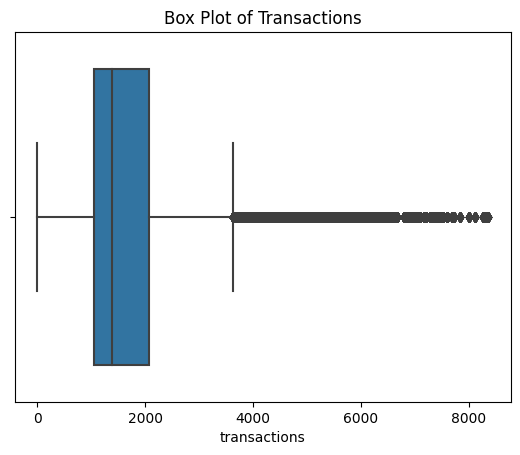

In [151]:
sns.boxplot(data=df_train, x='transactions')
plt.title('Box Plot of Transactions')
plt.show()


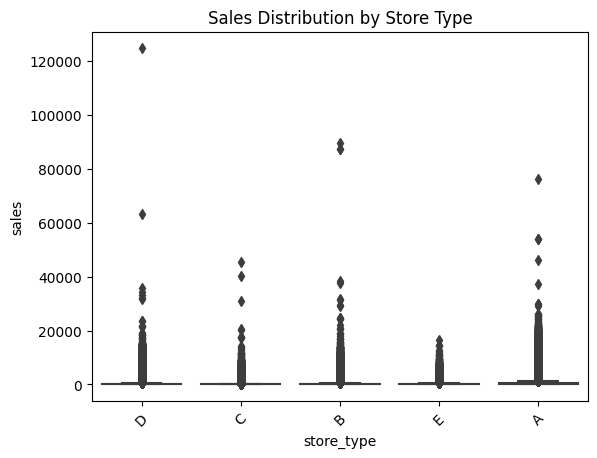

In [152]:
sns.boxplot(data=df_train, x='store_type', y='sales')
plt.title('Sales Distribution by Store Type')
plt.xticks(rotation=45)
plt.show()


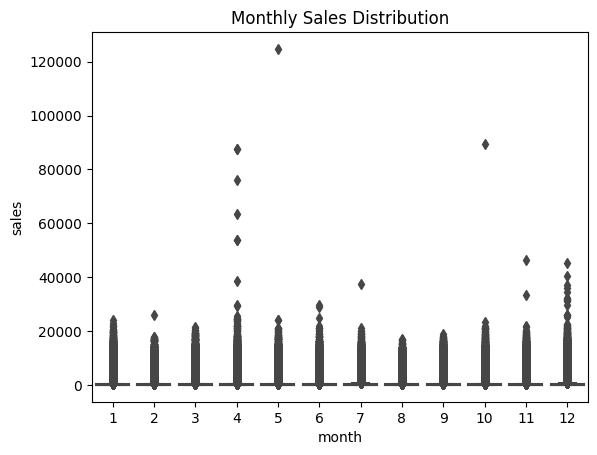

In [153]:
sns.boxplot(data=df_train, x='month', y='sales')
plt.title('Monthly Sales Distribution')
plt.show()


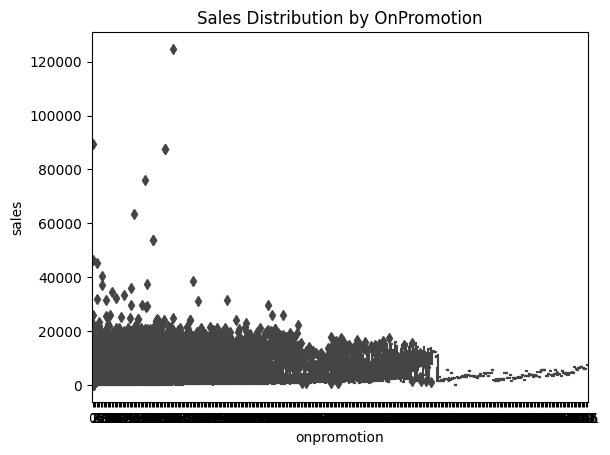

In [154]:
sns.boxplot(data=df_train, x='onpromotion', y='sales')
plt.title('Sales Distribution by OnPromotion')
plt.show()


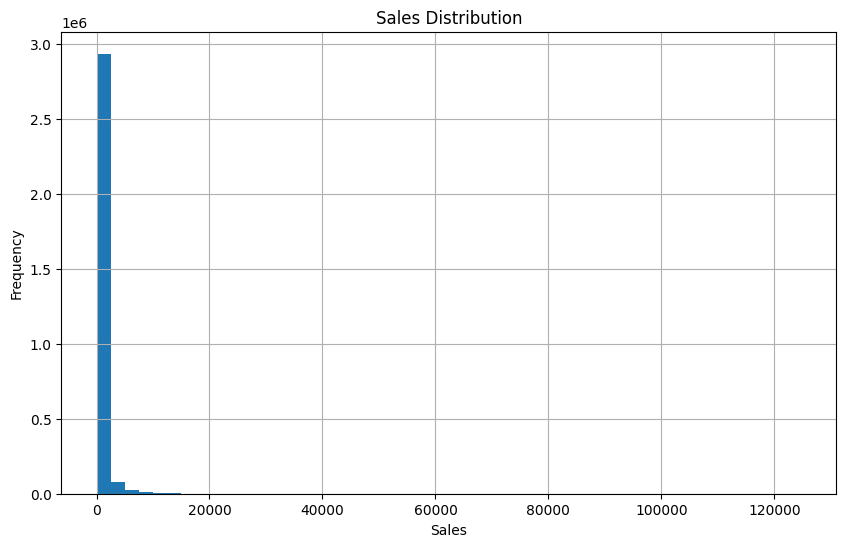

In [156]:
df_train['sales'].hist(bins=50, figsize=(10, 6))
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


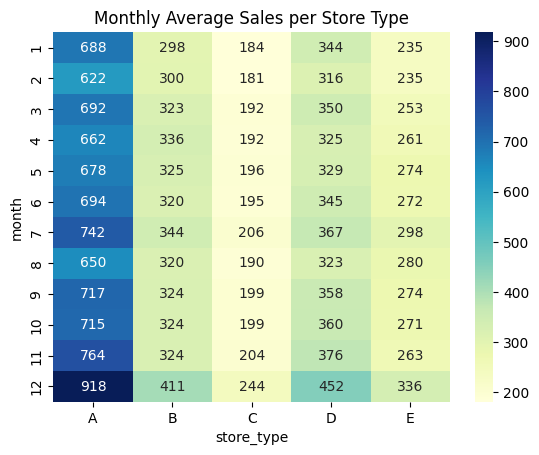

In [157]:
pivot = df_train.pivot_table(index='month', columns='store_type', values='sales', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly Average Sales per Store Type')
plt.show()
